**Swetha Gayathri Kuchimanchi**

**LGM-VIP**

**TASK 4 - MNIST Handwritten Digit Classification - ADVANCED LEVEL TASK**



In [5]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

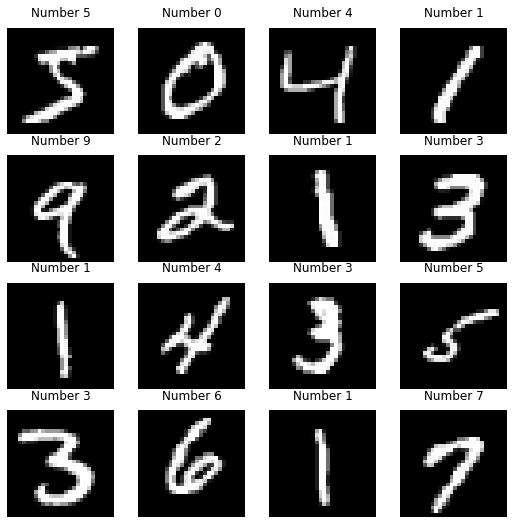

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (9, 9))
plt.gray()
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train[i]))
fig.show()

Number: 5


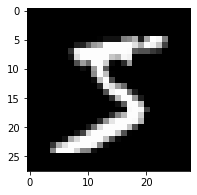

Number: 0


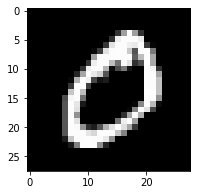

Number: 4


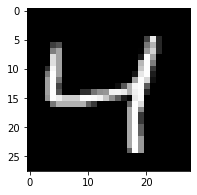

Number: 1


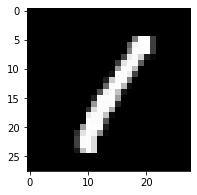

Number: 9


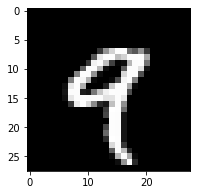

In [58]:
for i in range(0,5):
  plt.figure(figsize=(3,3))
  plt.imshow(x_train[i])
  print("Number:",y_train[i])
  plt.show()


In [59]:
x_train.ndim

3

In [60]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print(x_train.ndim)


4


In [61]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [63]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2048 - accuracy: 0.9388
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0808 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0564 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0441 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0349 - accuracy: 0.9883


In [64]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0506 - accuracy: 0.9851


[0.05060875788331032, 0.9850999712944031]

In [65]:
p=model.predict(x_test)
p[0]

array([6.8676593e-09, 2.6212840e-08, 1.0287652e-09, 2.2619802e-06,
       6.1510033e-12, 6.5622896e-11, 1.7069399e-14, 9.9999762e-01,
       4.6918867e-08, 4.8362089e-08], dtype=float32)